Customer Personality Analysis
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis Набор представляет собой данные о покупателях
Пример цели: Узнать, кто больше всего покупает продукцию (вино)
Входные данные: год рождения, степень образования, статус отношений, сколько детей, сколько подростков, сколько было потрачено на вино

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(".//static//csv//ds_salaries.csv")
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


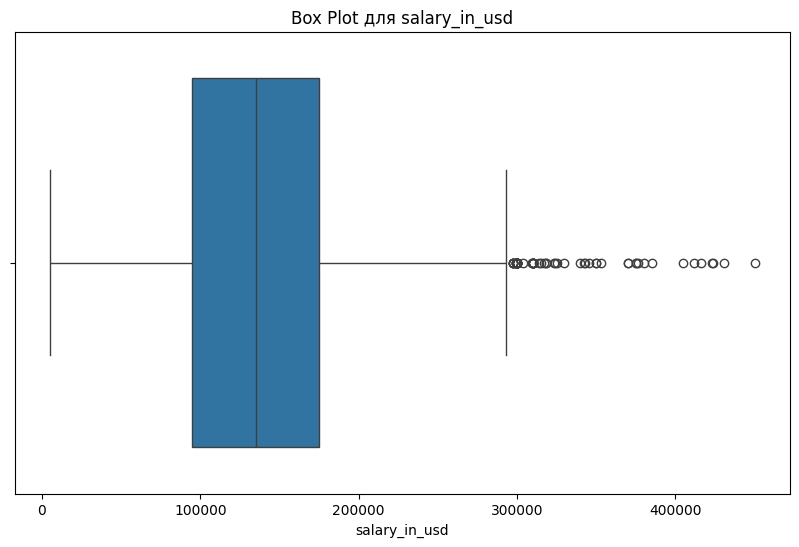

In [262]:
# Визуализация данных - ящик с усами. Как видим - выборка относительно сбалансирована, есть среднее смещение в среднюю сторону, медиана уравновешена
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["salary_in_usd"])
plt.title("Box Plot для salary_in_usd")
plt.xlabel("salary_in_usd")
plt.show()

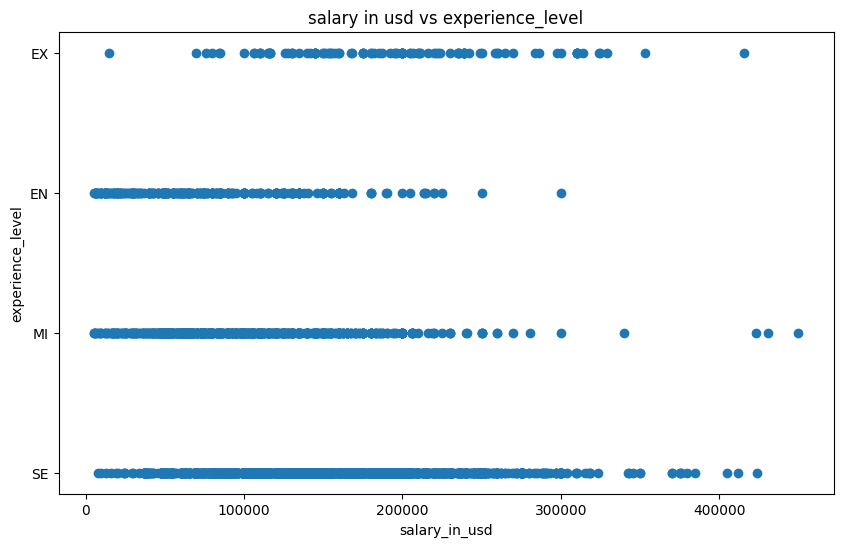

In [263]:
# Визуализируем отношение размера компании и зарплаты
plt.figure(figsize=(10, 6))
plt.scatter(df["salary_in_usd"], df["experience_level"])
plt.xlabel("salary_in_usd")
plt.ylabel("experience_level")
plt.title("salary in usd vs experience_level")
plt.show()

Выбросы:
      work_year experience_level employment_type  \
33         2023               SE              FT   
68         2023               SE              FT   
83         2022               EN              FT   
133        2023               SE              FT   
145        2023               SE              FT   
...         ...              ...             ...   
3522       2020               MI              FT   
3675       2021               EX              CT   
3697       2020               EX              FT   
3747       2021               MI              FT   
3750       2020               SE              FT   

                               job_title  salary salary_currency  \
33              Computer Vision Engineer  342810             USD   
68                     Applied Scientist  309400             USD   
83                          AI Developer  300000             USD   
133            Machine Learning Engineer  342300             USD   
145            Machine Lea

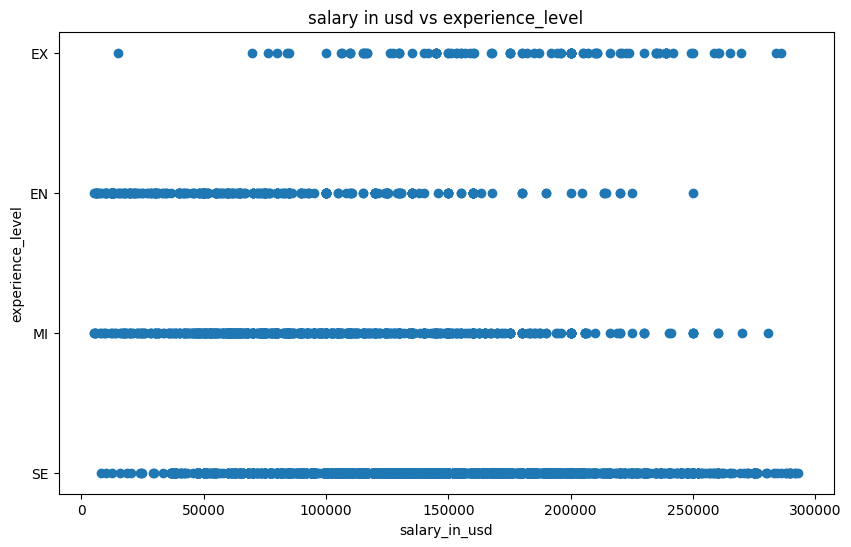

In [264]:
# Есть шумы, убираем


# Статистический анализ для определения выбросов
Q1 = df["salary_in_usd"].quantile(0.25)
Q3 = df["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df["salary_in_usd"] < (Q1 - threshold)) | (
    df["salary_in_usd"] > (Q3 + threshold)
)

# Вывод выбросов
print("Выбросы:")
print(df[outliers])

# Обработка выбросов
# В данном случае мы уберем выбросы
median_salary = df["salary_in_usd"].median()
df.loc[outliers, "salary_in_usd"] = 0
df = df[df.salary_in_usd != 0]

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df["salary_in_usd"], df["experience_level"])
plt.xlabel("salary_in_usd")
plt.ylabel("experience_level")
plt.title("salary in usd vs experience_level")
plt.show()

Теперь создадим выборки.

In [265]:
from sklearn.model_selection import train_test_split

# Загрузка данных
train_df = pd.read_csv(".//static//csv//train_data.csv")
val_df = pd.read_csv(".//static//csv//val_data.csv")
test_df = pd.read_csv(".//static//csv//test_data.csv")

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))


def check_balance(df, name):
    counts = df["salary_in_usd"].value_counts()
    print(f"Распределение salary_in_usd в {name}:")
    print(counts)
    print()


check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Размер обучающей выборки: 2214
Размер контрольной выборки: 739
Размер тестовой выборки: 739
Распределение salary_in_usd в обучающей выборке:
salary_in_usd
130000    60
150000    59
100000    56
160000    56
120000    52
          ..
127500     1
9466       1
57872      1
134024     1
122900     1
Name: count, Length: 741, dtype: int64

Распределение salary_in_usd в контрольной выборке:
salary_in_usd
100000    25
150000    20
140000    19
120000    16
135000    16
          ..
240500     1
93919      1
77364      1
87738      1
99050      1
Name: count, Length: 354, dtype: int64

Распределение salary_in_usd в тестовой выборке:
salary_in_usd
120000    23
150000    19
100000    18
160000    16
200000    13
          ..
109000     1
133000     1
245000     1
51039      1
146300     1
Name: count, Length: 364, dtype: int64



In [266]:
from imblearn.over_sampling import RandomOverSampler


def oversample(df):
    X = df.drop("salary_in_usd", axis=1)
    y = df["salary_in_usd"]

    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)  # type: ignore

    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df


train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение salary_in_usd в обучающей выборке после oversampling:
salary_in_usd
127221    60
105000    60
100000    60
260000    60
130000    60
          ..
110000    60
113900    60
54685     60
193900    60
50000     60
Name: count, Length: 741, dtype: int64

Распределение salary_in_usd в контрольной выборке после oversampling:
salary_in_usd
99050     25
126277    25
38400     25
56738     25
215050    25
          ..
75000     25
140000    25
100000    25
175000    25
90734     25
Name: count, Length: 354, dtype: int64

Распределение salary_in_usd в тестовой выборке после oversampling:
salary_in_usd
219000    23
143860    23
72500     23
140000    23
66837     23
          ..
126000    23
109000    23
220000    23
250000    23
80000     23
Name: count, Length: 364, dtype: int64



Forbes Billionaires Database

https://www.kaggle.com/datasets/surajjha101/forbes-billionaires-data-preprocessed Список биллионеров форбс
Использование: Узнать, когда же разбогатеешь
Входные данные: Имя, Возраст, Страна, компания, Индустрия

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(".//static//csv//Forbes Billionaires.csv")
print(df.columns)

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')


Анализируем датафрейм при помощи "ящика с усами". Естьсмещение в сторону меньших значений, это можно исправить при помощи oversampling и undersampling.

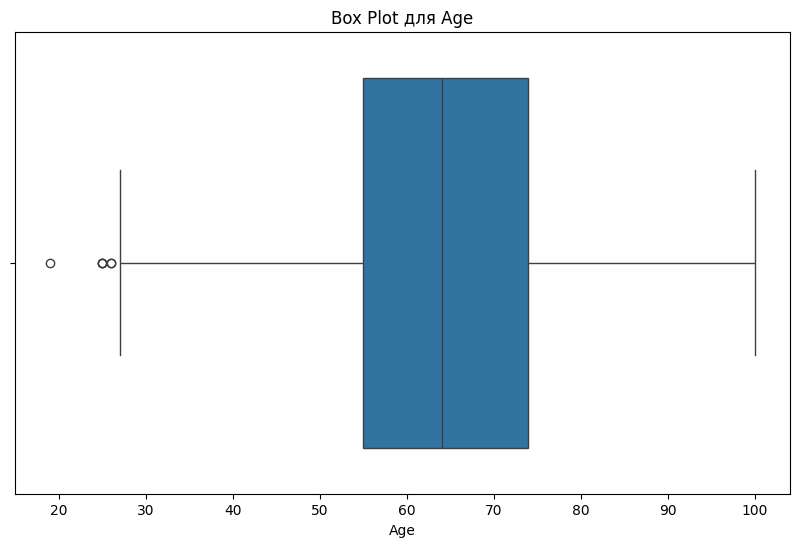

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot для столбца Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot для Age')
plt.xlabel('Age')
plt.show()

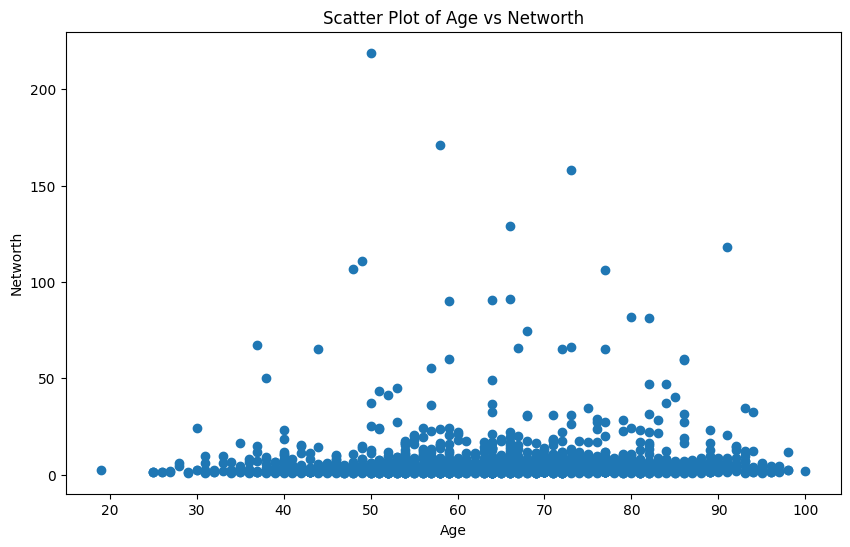

Выбросы:
      Rank                   Name  Networth  Age  Country       Source  \
1311   1292  Kevin David Lehmann        2.4   19  Germany   drugstores   
1961   1929    Henrique Dubugras        1.5   26   Brazil      fintech   
1975   1929     Pedro Franceschi        1.5   25   Brazil      fintech   
2062   1929          Wang Zelong        1.5   25    China    chemicals   
2190   2190   Alexandra Andresen        1.3   25   Norway  investments   
2191   2190   Katharina Andresen        1.3   26   Norway  investments   

                    Industry  
1311       Fashion & Retail   
1961  Finance & Investments   
1975  Finance & Investments   
2062        Metals & Mining   
2190          diversified     
2191          diversified     


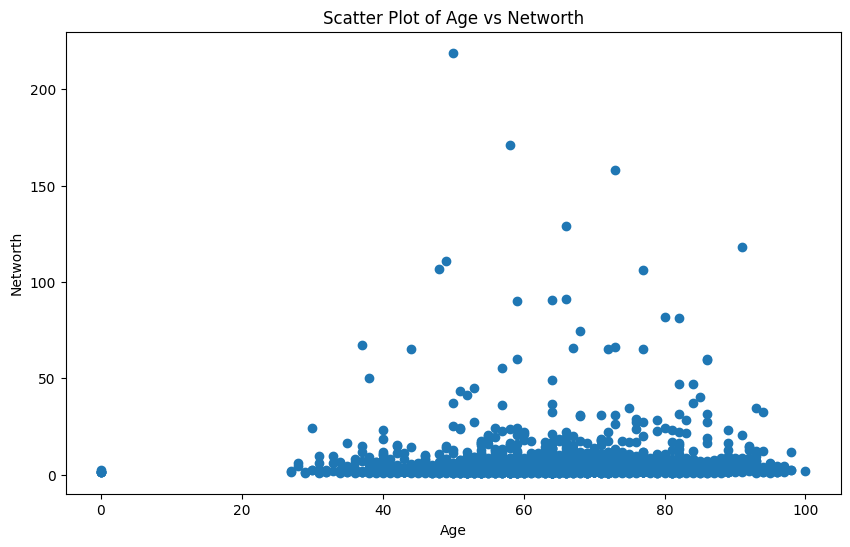

In [269]:
# Имеется смещение в меньшую сторону, в том числе и медианное
df_cleaned = df.dropna()
plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["Networth"])
plt.xlabel("Age")
plt.ylabel("Networth")
plt.title("Scatter Plot of Age vs Networth")
plt.show()

# уберем шумы

# Статистический анализ для определения выбросов
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df["Age"] < (Q1 - threshold)) | (
    df["Age"] > (Q3 + threshold)
)

# Вывод выбросов
print("Выбросы:")
print(df[outliers])

# Обработка выбросов
# В данном случае мы занулим выбросы
median_charge = df["Age"].median()
df.loc[outliers, "Age"] = 0


# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["Networth"])
plt.xlabel("Age")
plt.ylabel("Networth")
plt.title("Scatter Plot of Age vs Networth")
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [270]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 1560
Размер контрольной выборки: 520
Размер тестовой выборки: 520


Видим недостаток баланса:

In [271]:
def check_balance(df, name):
    counts = df['Age'].value_counts()
    print(f"Распределение Age в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение Age в обучающей выборке:
Age
64    95
66    53
58    51
59    50
56    47
      ..
98     2
30     1
29     1
27     1
25     1
Name: count, Length: 73, dtype: int64

Распределение Age в контрольной выборке:
Age
64    27
54    23
60    17
57    15
81    15
      ..
27     1
32     1
29     1
19     1
42     1
Name: count, Length: 66, dtype: int64

Распределение Age в тестовой выборке:
Age
64     30
68     24
72     22
65     22
58     18
       ..
100     1
88      1
93      1
91      1
33      1
Name: count, Length: 62, dtype: int64



Используем oversample

In [272]:
from imblearn.over_sampling import RandomOverSampler

def oversample(df):
    X = df.drop('Age', axis=1)
    y = df['Age']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение Age в обучающей выборке после oversampling:
Age
59    95
70    95
71    95
81    95
67    95
      ..
94    95
29    95
96    95
27    95
25    95
Name: count, Length: 73, dtype: int64

Распределение Age в контрольной выборке после oversampling:
Age
57    27
69    27
72    27
64    27
54    27
      ..
29    27
38    27
19    27
89    27
42    27
Name: count, Length: 66, dtype: int64

Распределение Age в тестовой выборке после oversampling:
Age
68    30
70    30
76    30
74    30
64    30
      ..
42    30
88    30
93    30
91    30
33    30
Name: count, Length: 62, dtype: int64



## 100 Highest-Valued Unicorns


https://www.kaggle.com/datasets/ankanhore545/100-highest-valued-unicorns Самые взлетевшие компании.
Цель: создать свою супер-компанию
Входные данные: Название компании, оценочная стоимость, страна, штат, город, индустрия, год основания, имя основателя, количество работников

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(".//static//csv//healthcare-dataset-stroke-data.csv", sep=",")

df["age"] = df["age"].astype(int)
print(df)
df["age"].dtype

print(df.columns)

         id  gender  age  hypertension  heart_disease ever_married  \
0      9046    Male   67             0              1          Yes   
1     51676  Female   61             0              0          Yes   
2     31112    Male   80             0              1          Yes   
3     60182  Female   49             0              0          Yes   
4      1665  Female   79             1              0          Yes   
...     ...     ...  ...           ...            ...          ...   
5105  18234  Female   80             1              0          Yes   
5106  44873  Female   81             0              0          Yes   
5107  19723  Female   35             0              0          Yes   
5108  37544    Male   51             0              0          Yes   
5109  44679  Female   44             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   

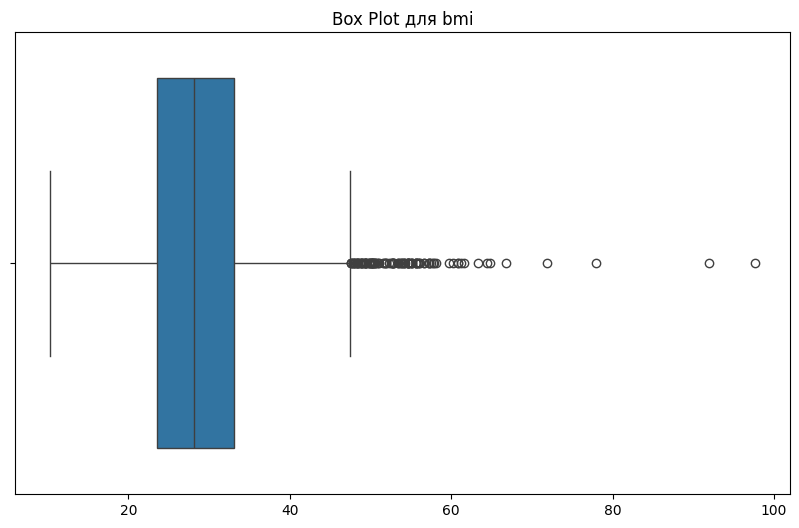

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(x=df["bmi"])
plt.title('Box Plot для bmi')
plt.xlabel('')
plt.show()

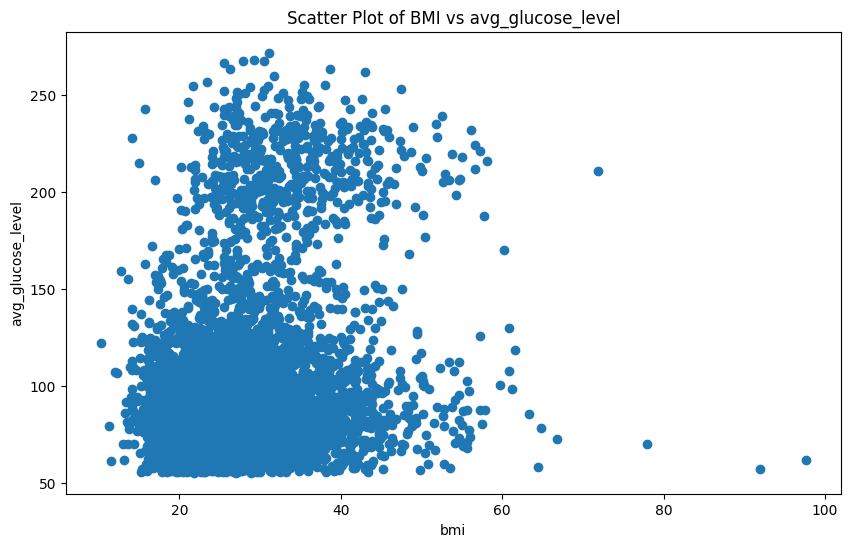

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns


# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df["bmi"], df["avg_glucose_level"])
plt.xlabel("bmi")
plt.ylabel("avg_glucose_level")
plt.title("Scatter Plot of BMI vs avg_glucose_level")
plt.show()

Удаление строк с пустыми значениями

Выбросы:
         id  gender  age  hypertension  heart_disease ever_married  \
21    13861  Female   52             1              0          Yes   
113   41069  Female   45             0              0          Yes   
254   32257  Female   47             0              0          Yes   
258   28674  Female   74             1              0          Yes   
270   72911  Female   57             1              0          Yes   
...     ...     ...  ...           ...            ...          ...   
4858   1696  Female   43             0              0          Yes   
4906  72696  Female   53             0              0          Yes   
4952  16245    Male   51             1              0          Yes   
5009  40732  Female   50             0              0          Yes   
5057  38349  Female   49             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
21    Self-employed          Urban             233.29  48.9     never 

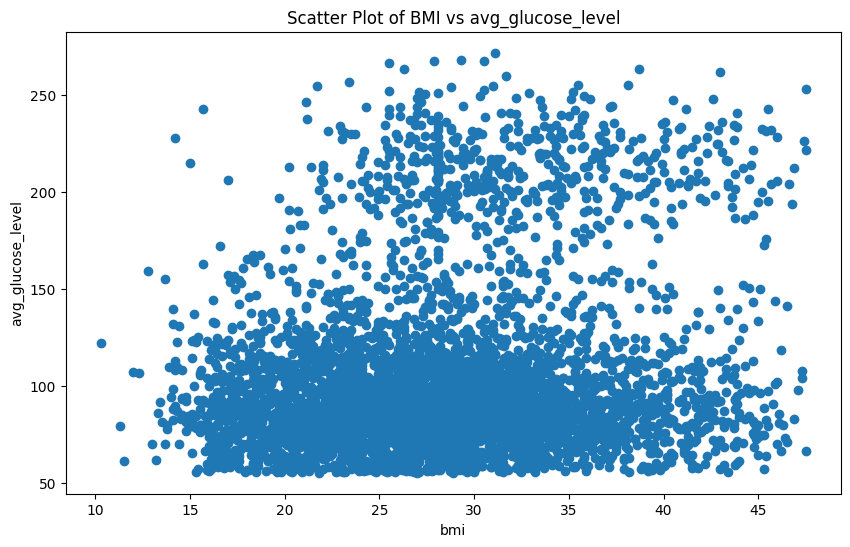

In [276]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.loc[df_cleaned["bmi"] != "N/A"]
# уберем шумы

# Статистический анализ для определения выбросов
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df["bmi"] < (Q1 - threshold)) | (df["bmi"] > (Q3 + threshold))

# Вывод выбросов
print("Выбросы:")
print(df[outliers])

# Обработка выбросов
# В данном случае мы занулим выбросы на медиану
median = df["bmi"].median()
df.loc[outliers, "bmi"] = median


# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df["bmi"], df["avg_glucose_level"])
plt.xlabel("bmi")
plt.ylabel("avg_glucose_level")
plt.title("Scatter Plot of BMI vs avg_glucose_level")
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

Применение методов приращения данных (аугментации)

In [277]:
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

def check_balance(df, name):
    counts = df["age"].value_counts()
    print(f"Распределение в {name}:")
    print(counts)
    print()


check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

def oversample(df):
    X = df.drop("age", axis=1)
    y = df["age"]

    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore

    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df


train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Размер обучающей выборки: 2945
Размер контрольной выборки: 982
Размер тестовой выборки: 982
Распределение в обучающей выборке:
age
37    57
52    55
56    54
57    54
53    52
      ..
72    20
68    20
7     17
4     14
6     13
Name: count, Length: 83, dtype: int64

Распределение в контрольной выборке:
age
78    22
51    21
41    21
18    18
63    18
      ..
9      6
10     5
12     5
74     4
67     2
Name: count, Length: 83, dtype: int64

Распределение в тестовой выборке:
age
78    25
44    23
54    23
50    21
57    21
      ..
11     6
76     5
7      5
77     4
6      4
Name: count, Length: 83, dtype: int64

Распределение в обучающей выборке после oversampling:
age
32    57
81    57
42    57
31    57
23    57
      ..
10    57
74    57
76    57
4     57
29    57
Name: count, Length: 83, dtype: int64

Распределение в контрольной выборке после oversampling:
age
28    22
74    22
30    22
14    22
71    22
      ..
80    22
18    22
82    22
65    22
67    22
Name: count, Length: 

In [278]:
from imblearn.over_sampling import RandomOverSampler


def oversample(df):
    X = df.drop("age", axis=1)
    y = df["age"]

    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore

    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df


train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение в обучающей выборке после oversampling:
age
32    57
81    57
42    57
31    57
23    57
      ..
10    57
74    57
76    57
4     57
29    57
Name: count, Length: 83, dtype: int64

Распределение в контрольной выборке после oversampling:
age
28    22
74    22
30    22
14    22
71    22
      ..
80    22
18    22
82    22
65    22
67    22
Name: count, Length: 83, dtype: int64

Распределение в тестовой выборке после oversampling:
age
80    25
42    25
66    25
29    25
47    25
      ..
7     25
72    25
76    25
34    25
13    25
Name: count, Length: 83, dtype: int64

